In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
# writing to file
fname = 'CIFAR10_coreset_result.txt'
file = open(fname, 'r')
Lines = file.readlines()

coreset_result = np.zeros((8, 50)) # method, rate
method, cycle = -1, 0

for line in Lines:
    line = line.strip()
    if line in ['RAND', 'LeastCONF', 'Forgetting', 'GraNd', 'kCenterGreedy', 'GraphCut', 'Glister', 'AL (Margin)']:
        method +=1
        cycle = 0
    else:
        #print(line.split('\t'))
        #print(line)
        acc = line.split('\t')[0]
        coreset_result[method, cycle] = float(acc)
        cycle+=1

In [20]:
std = [[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.9, 0.5, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2],
       [1.3, 0.9, 0.5, 0.3, 0.2, 0.3, 0.1, 0.2, 0.1, 0.2], 
       [1.3, 0.9, 0.4, 0.4, 0.3, 0.4, 0.2, 0.2, 0.2, 0.2],
       [1.5, 0.6, 0.4, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2],
       [2.0, 1.0, 0.6, 0.5, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2], 
       [1.8, 0.9, 0.5, 0.4, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2],
       [1.5, 0.9, 0.7, 0.5, 0.6, 0.6, 0.4, 0.3, 0.2, 0.2],
       [1.7, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2],
       [1.7, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2],
       [1.9, 0.7, 0.6, 0.5, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2]]

10 10


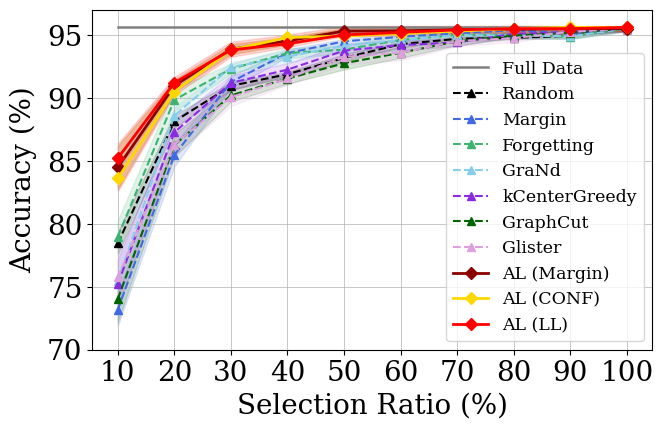

In [22]:
plt.figure(figsize=(8, 5), dpi=100)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Serif"
plt.rcParams['hatch.linewidth'] = 2
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = 'Serif'
plt.rcParams['mathtext.it'] = 'Serif'
plt.rcParams['mathtext.bf'] = 'Serif'

methods = ['Full Data', 'Random', 'Margin', 'Forgetting', 'GraNd', 'kCenterGreedy', 'GraphCut', 'Glister', 'AL (Margin)', 'AL (CONF)', 'AL (LL)'] #, 'OURS', 'PairCE', '2step']
colors = [ 'grey', 'black', 'royalblue', 'mediumseagreen', 'skyblue', 'blueviolet', 'darkgreen', 'plum', 'darkred', 'gold', 'red'] #, 'red', 'deeppink', 'darkred'] #, 'gold', 'red']

x = range(10, 110, 10)
y_full = [95.6, 95.6, 95.6, 95.6, 95.6, 95.6, 95.6, 95.6, 95.6, 95.6]
plt.plot(x, y_full, linestyle='-', linewidth=1.8, color=colors[0])
plt.fill_between(x, y-std[0], y+std[0], alpha=0.15, color=colors[0])

for i, result_per_m in enumerate(coreset_result):
    x = range(10, 110, 10)
    y = result_per_m[4::5]
    
    if i < 7: #CORESET
        plt.plot(x, y, linestyle='--', marker='^', color=colors[i+1])
        plt.fill_between(x, y-std[i+1], y+std[i+1], alpha=0.15, color=colors[i+1])
    elif i == 7: #AL
        plt.plot(x, y, linestyle='-', linewidth=2, marker='D', color=colors[i+1])
        plt.fill_between(x, y-std[i+1], y+std[i+1], alpha=0.15, color=colors[i+1])

# CONF
x1 = range(10, 110, 10)
y1 = [83.6, 90.5, 93.8, 94.8, 94.9, 95.1, 95.3, 95.5, 95.6, 95.6]
# LL
x2 = range(10, 110, 10)
y2 = [85.2, 91.2, 93.8, 94.3, 95.0, 95.2, 95.4, 95.5, 95.5, 95.6]
        
'''
#OURS
# vanilla version
x1 = [21, 27, 31, 36, 39, 43, 48, 55, 64, 78, 82, 90]
y1 = [76.3, 90.08, 92.89, 93.8, 94.44, 94.62, 95.18, 95.17, 95.54, 95.37, 95.38, 95.3]
# pairwise CE
x2 = [9, 21, 35, 39, 41, 46, 48, 62, 90]
y2 = [60.61, 89.27, 93.8, 94.3, 94.71, 94.9, 95.05, 95.26, 95.46]
# 2step
x3 = [17, 19, 25, 34, 41, 46, 48, 62]
y3 = [73.24, 82.27, 89.35, 93.84, 94.71, 94.8, 94.95, 95.26]
'''

print(len(x), len(y))
plt.plot(x1, y1, linestyle='-', linewidth=2, marker='D', color=colors[i+2])
plt.fill_between(x, y-std[i+2], y+std[i+2], alpha=0.15, color=colors[i+2])
plt.plot(x2, y2, linestyle='-', linewidth=2, marker='D', color=colors[i+3])
plt.fill_between(x, y-std[i+3], y+std[i+3], alpha=0.15, color=colors[i+3])
#plt.plot(x3, y3, linestyle='-', linewidth=2, marker='D', color=colors[i+3])

plt.grid(True, linewidth=0.5)
plt.xticks(range(10, 110, 10), size=20)
plt.yticks(size=20)
plt.ylim([70, 97])
plt.xlabel('Selection Ratio (%)', size=20)
plt.ylabel('Accuracy (%)', size=20, labelpad = 7)
plt.legend(methods, fontsize=12.5)

plt.gcf().subplots_adjust(left=0.20)
plt.gcf().subplots_adjust(bottom=0.20)

plt.savefig('Cifar10_coreset_vs_al.pdf')

In [30]:
# writing to file
fname = 'CIFAR100_coreset_result.txt'
file = open(fname, 'r')
Lines = file.readlines()

coreset_result = np.zeros((8, 50)) # method, rate
method, cycle = -1, 0

for line in Lines:
    line = line.strip()
    if line in ['RAND', 'Margin', 'Forgetting', 'GraNd', 'kCenterGreedy', 'GraphCut', 'Glister', 'AL(Margin)']:
        method +=1
        cycle = 0
    else:
        #print(line.split('\t'))
        #print(line)
        acc = line.split('\t')[0]
        coreset_result[method, cycle] = float(acc)
        cycle+=1

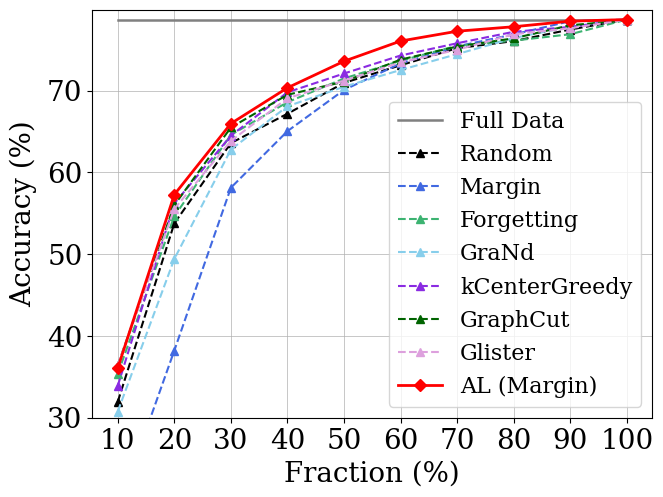

In [33]:
plt.figure(figsize=(8, 6), dpi=100)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Serif"
plt.rcParams['hatch.linewidth'] = 2
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = 'Serif'
plt.rcParams['mathtext.it'] = 'Serif'
plt.rcParams['mathtext.bf'] = 'Serif'

methods = ['Full Data', 'Random', 'Margin', 'Forgetting', 'GraNd', 'kCenterGreedy', 'GraphCut', 'Glister', 'AL (Margin)'] #, 'OURS', 'PairCE', '2step']
colors = [ 'grey', 'black', 'royalblue', 'mediumseagreen', 'skyblue', 'blueviolet', 'darkgreen', 'plum', 'red'] #, 'red', 'deeppink', 'darkred'] #, 'gold', 'red']

x = range(10, 110, 10)
y_full = [78.7, 78.7, 78.7, 78.7, 78.7, 78.7, 78.7, 78.7, 78.7, 78.7]
plt.plot(x, y_full, linestyle='-', linewidth=1.8, color=colors[0])

for i, result_per_m in enumerate(coreset_result):
    x = range(10, 110, 10)
    y = result_per_m[4::5]
    
    if i < 7: #CORESET
        plt.plot(x, y, linestyle='--', marker='^', color=colors[i+1])
    elif i == 7: #AL
        plt.plot(x, y, linestyle='-', linewidth=2, marker='D', color=colors[i+1])


#OURS
# vanilla version
x1 = [21, 27, 31, 36, 39, 43, 48, 55, 64, 78, 82, 90]
y1 = [76.3, 90.08, 92.89, 93.8, 94.44, 94.62, 95.18, 95.17, 95.54, 95.37, 95.38, 95.3]
# pairwise CE
x2 = [9, 21, 35, 39, 41, 46, 48, 62, 90]
y2 = [60.61, 89.27, 93.8, 94.3, 94.71, 94.9, 95.05, 95.26, 95.46]
# 2step
x3 = [17, 19, 25, 34, 41, 46, 48, 62]
y3 = [73.24, 82.27, 89.35, 93.84, 94.71, 94.8, 94.95, 95.26]

#print(len(x), len(y))
#plt.plot(x1, y1, linestyle='-', linewidth=2, marker='D', color=colors[i+1])
#plt.plot(x2, y2, linestyle='-', linewidth=2, marker='D', color=colors[i+2])
#plt.plot(x3, y3, linestyle='-', linewidth=2, marker='D', color=colors[i+3])

plt.grid(True, linewidth=0.5)
plt.xticks(range(10, 110, 10), size=20)
plt.yticks(size=20)
plt.ylim([30, 79.9])
plt.xlabel('Fraction (%)', size=20)
plt.ylabel('Accuracy (%)', size=20, labelpad = 7)
plt.legend(methods, fontsize=16)

plt.gcf().subplots_adjust(left=0.20)
plt.gcf().subplots_adjust(bottom=0.20)

plt.savefig('Cifar100_coreset_vs_al.pdf')

In [27]:
# writing to file
fname = 'ImageNet30_coreset_result.txt'
file = open(fname, 'r')
Lines = file.readlines()

coreset_result = np.zeros((8, 50)) # method, rate
method, cycle = -1, 0

for line in Lines:
    line = line.strip()
    if line in ['RAND', 'Margin', 'Forgetting', 'GraNd', 'kCenterGreedy', 'GraphCut', 'Glister', 'AL(Margin)']:
        method +=1
        cycle = 0
    else:
        #print(line.split('\t'))
        #print(line)
        acc = line.split('\t')[0]
        coreset_result[method, cycle] = float(acc)
        cycle+=1

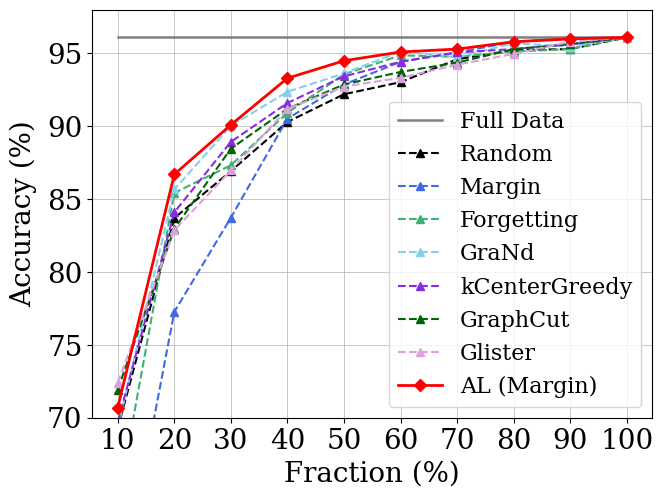

In [29]:
plt.figure(figsize=(8, 6), dpi=100)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Serif"
plt.rcParams['hatch.linewidth'] = 2
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = 'Serif'
plt.rcParams['mathtext.it'] = 'Serif'
plt.rcParams['mathtext.bf'] = 'Serif'

methods = ['Full Data', 'Random', 'Margin', 'Forgetting', 'GraNd', 'kCenterGreedy', 'GraphCut', 'Glister', 'AL (Margin)'] #, 'OURS', 'PairCE', '2step']
colors = [ 'grey', 'black', 'royalblue', 'mediumseagreen', 'skyblue', 'blueviolet', 'darkgreen', 'plum', 'red'] #, 'red', 'deeppink', 'darkred'] #, 'gold', 'red']

x = range(10, 110, 10)
y_full = [96.1, 96.1, 96.1, 96.1, 96.1, 96.1, 96.1, 96.1, 96.1, 96.1]
plt.plot(x, y_full, linestyle='-', linewidth=1.8, color=colors[0])

for i, result_per_m in enumerate(coreset_result):
    x = range(10, 110, 10)
    y = result_per_m[4::5]
    
    if i < 7: #CORESET
        plt.plot(x, y, linestyle='--', marker='^', color=colors[i+1])
    elif i == 7: #AL
        plt.plot(x, y, linestyle='-', linewidth=2, marker='D', color=colors[i+1])


#OURS
# vanilla version
x1 = [21, 27, 31, 36, 39, 43, 48, 55, 64, 78, 82, 90]
y1 = [76.3, 90.08, 92.89, 93.8, 94.44, 94.62, 95.18, 95.17, 95.54, 95.37, 95.38, 95.3]
# pairwise CE
x2 = [9, 21, 35, 39, 41, 46, 48, 62, 90]
y2 = [60.61, 89.27, 93.8, 94.3, 94.71, 94.9, 95.05, 95.26, 95.46]
# 2step
x3 = [17, 19, 25, 34, 41, 46, 48, 62]
y3 = [73.24, 82.27, 89.35, 93.84, 94.71, 94.8, 94.95, 95.26]

#print(len(x), len(y))
#plt.plot(x1, y1, linestyle='-', linewidth=2, marker='D', color=colors[i+1])
#plt.plot(x2, y2, linestyle='-', linewidth=2, marker='D', color=colors[i+2])
#plt.plot(x3, y3, linestyle='-', linewidth=2, marker='D', color=colors[i+3])

plt.grid(True, linewidth=0.5)
plt.xticks(range(10, 110, 10), size=20)
plt.yticks(size=20)
plt.ylim([70, 98])
plt.xlabel('Fraction (%)', size=20)
plt.ylabel('Accuracy (%)', size=20, labelpad = 7)
plt.legend(methods, fontsize=16)

plt.gcf().subplots_adjust(left=0.20)
plt.gcf().subplots_adjust(bottom=0.20)

plt.savefig('ImageNet30_coreset_vs_al.pdf')

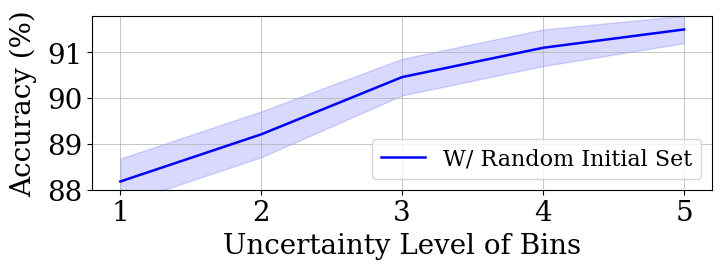

In [14]:
plt.figure(figsize=(8, 3), dpi=100)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Serif"
plt.rcParams['hatch.linewidth'] = 2
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = 'Serif'
plt.rcParams['mathtext.it'] = 'Serif'
plt.rcParams['mathtext.bf'] = 'Serif'

methods = ['W/ Random Initial Set'] #, 'OURS', 'PairCE', '2step']
colors = [ 'Blue'] #, 'red', 'deeppink', 'darkred'] #, 'gold', 'red']

x = [1,2,3,4,5]
y_group1 = np.array([88.18, 89.21, 90.46, 91.1, 91.5])
std_1 = np.array([0.5, 0.5, 0.4, 0.4, 0.3])

plt.plot(x, y_group1, linestyle='-', linewidth=1.8, color=colors[0])
plt.fill_between(x, y_group1-std_1, y_group1+std_1, alpha=0.15, color=colors[0])

plt.grid(True, linewidth=0.5)
plt.xticks(x, size=20)
plt.yticks([88, 89, 90, 91], size=20)
plt.ylim([88, 91.8])
plt.xlabel('Uncertainty Level of Bins', size=20)
plt.ylabel('Accuracy (%)', size=20, labelpad = 7)
plt.legend(methods, loc='lower right', fontsize=16)

#plt.gcf().subplots_adjust(left=0.20)
plt.gcf().subplots_adjust(bottom=0.30)

plt.savefig('Random_effect_with.pdf')

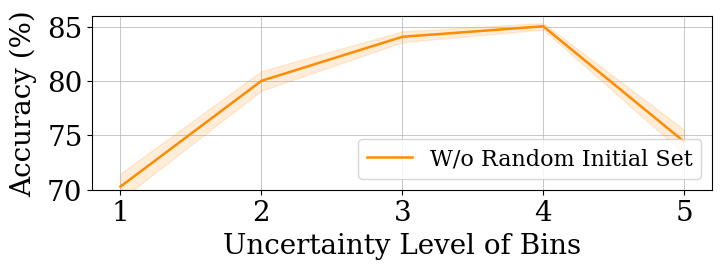

In [16]:
plt.figure(figsize=(8, 3), dpi=100)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Serif"
plt.rcParams['hatch.linewidth'] = 2
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = 'Serif'
plt.rcParams['mathtext.it'] = 'Serif'
plt.rcParams['mathtext.bf'] = 'Serif'

methods = ['W/o Random Initial Set'] #, 'OURS', 'PairCE', '2step']
colors = [ 'darkorange'] #, 'red', 'deeppink', 'darkred'] #, 'gold', 'red']

x = [1,2,3,4,5]
y_group2 = [70.29, 80.01, 84.06, 85.03, 74.42]
std_2 = np.array([1.2, 0.9, 0.5, 0.3, 1.1])
plt.plot(x, y_group2, linestyle='-', linewidth=1.8, color=colors[0])
plt.fill_between(x, y_group2-std_2, y_group2+std_2, alpha=0.15, color=colors[0])

plt.grid(True, linewidth=0.5)
plt.xticks(x, size=20)
plt.yticks([70, 75, 80, 85], size=20)
plt.ylim([70, 86])
plt.xlabel('Uncertainty Level of Bins', size=20)
plt.ylabel('Accuracy (%)', size=20, labelpad = 7)
plt.legend(methods, loc='lower right', fontsize=16)

#plt.gcf().subplots_adjust(left=0.20)
plt.gcf().subplots_adjust(bottom=0.30)

plt.savefig('Random_effect_without.pdf')